In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_parquet("/liubinxu/liubinxu/finance/learning/data/510050.qfq.kdj.parquet")

In [20]:
data_e = pd.read_parquet("/liubinxu/liubinxu/finance/learning/data/000016.qfq.kdj.parquet")

In [75]:
data = pd.read_parquet("/liubinxu/liubinxu/finance/learning/data/516950.qfq.kdj.parquet")

In [85]:

data = pd.read_parquet("/liubinxu/liubinxu/finance/learning/data/588000.qfq.kdj.parquet")

In [95]:
data = pd.read_parquet("/liubinxu/liubinxu/finance/learning/data/159745.qfq.kdj.parquet")

In [108]:
data = pd.read_parquet("/liubinxu/liubinxu/finance/learning/data/512100.qfq.kdj.parquet")

In [3]:
data["datetime"] = data["datetime"].map(str)

In [4]:
def calculate_kdj(df, n=9, k_period=3, d_period=3):
    # 计算最高价的 n 天最高价和最低价的 n 天最低价
    df['H_n'] = df['high'].rolling(window=n).max()
    df['L_n'] = df['low'].rolling(window=n).min()
    
    # 计算 RSV 值
    df['RSV'] = (df['close'] - df['L_n']) / (df['H_n'] - df['L_n']) * 100
    
    # 计算 K 值和 D 值
    df['K'] = df['RSV'].ewm(com=k_period-1).mean()
    df['D'] = df['K'].ewm(com=d_period-1).mean()
    
    # 计算 J 值
    df['J'] = 3 * df['K'] - 2 * df['D']
    
    # 删除中间计算的列
    df.drop(['H_n', 'L_n', 'RSV'], axis=1, inplace=True)
    
    return df


In [22]:
data = calculate_kdj(data, n=9*2, k_period=3*2, d_period=3*2)

In [6]:
data.columns

Index(['open', 'close', 'high', 'low', 'vol', 'amount', 'datetime', 'code',
       'date', 'date_stamp',
       ...
       'close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll480',
       'close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll24',
       'close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll96',
       'close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll480',
       'K', 'D', 'J', 'target_close1', 'target_close2', 'target_close5'],
      dtype='object', length=106)

In [5]:
data.columns[10:30]

Index(['time_stamp', 'type', 'volume', 'suogu', 'preclose', 'adj',
       'amount_48_seasonal_rolling_20_mean',
       'amount_48_seasonal_rolling_20_std',
       'amount_48_seasonal_rolling_5_mean', 'amount_48_seasonal_rolling_5_std',
       'amount_48_seasonal_rolling_60_mean',
       'amount_48_seasonal_rolling_60_std', 'amount_normalize5',
       'amount_normalize20', 'amount_normalize60', 'close_rolling_6_mean',
       'close_rolling_6_std', 'close_rolling_6_std_mean',
       'close_rolling_24_mean', 'close_rolling_24_std'],
      dtype='object')

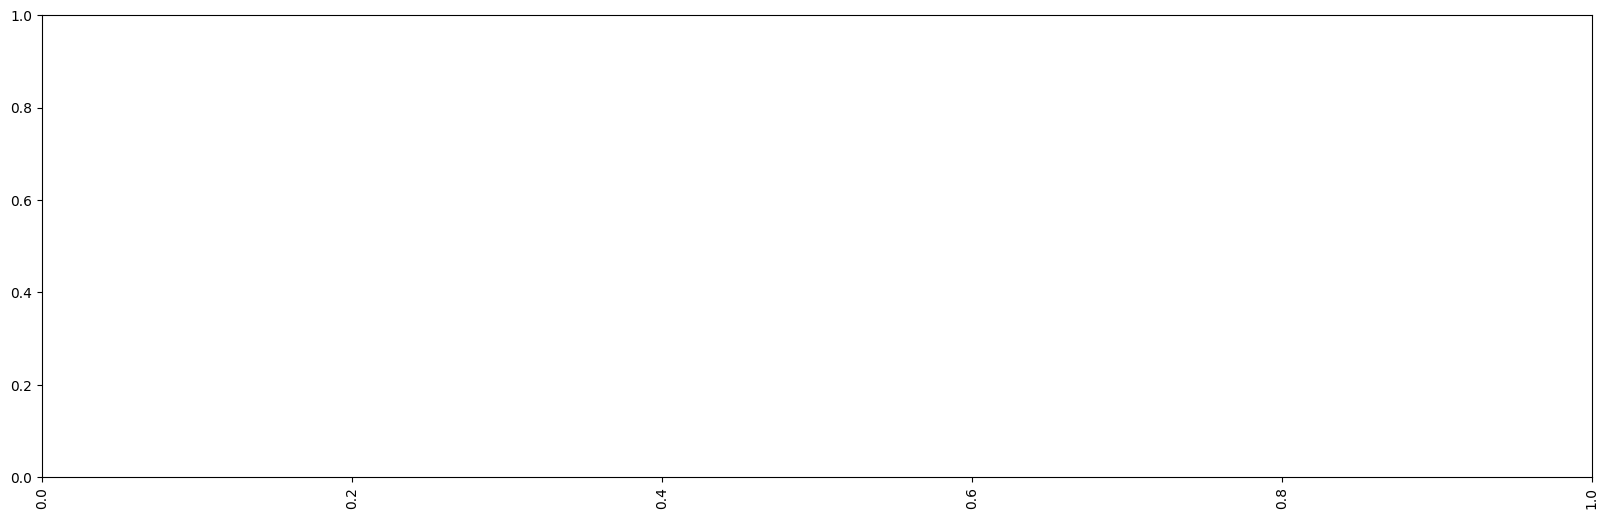

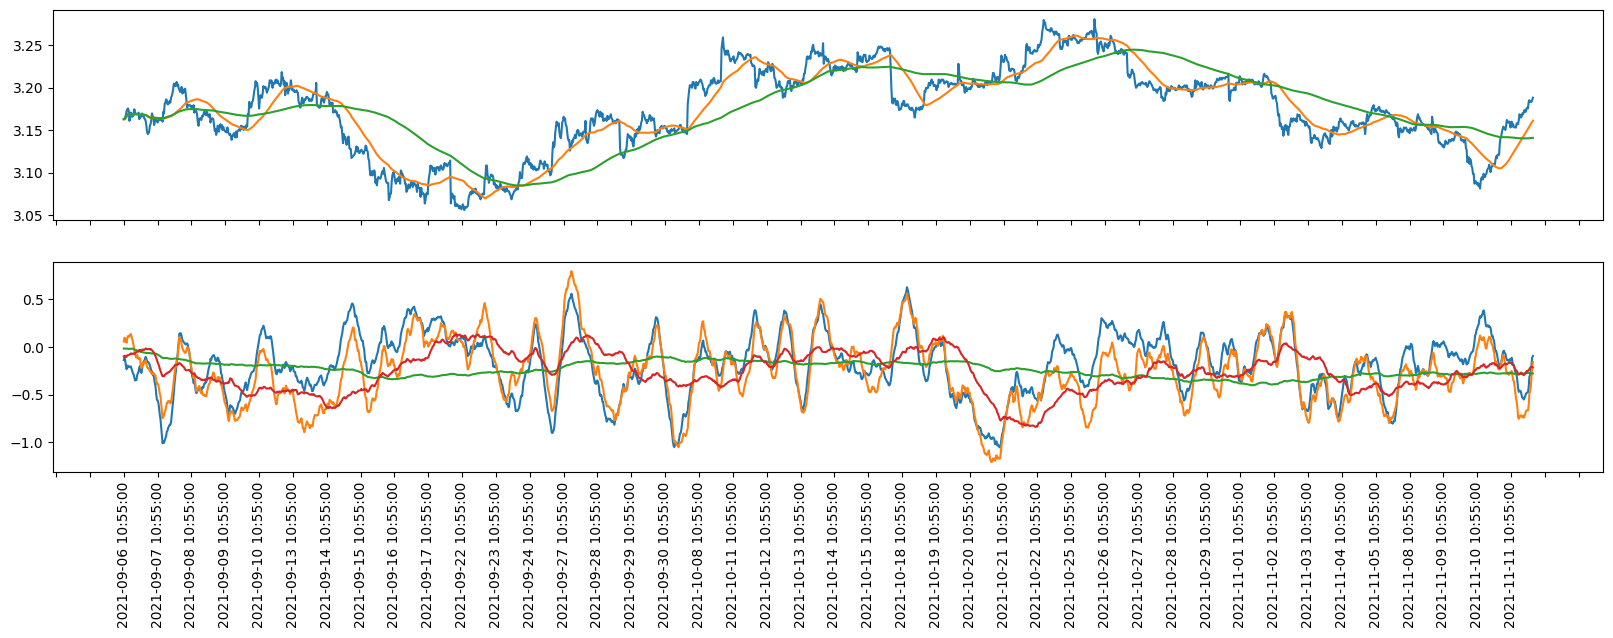

In [9]:
datac = data[-26000:-24000]
import matplotlib.ticker as ticker
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,6)

fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
# fig, ax = plt.subplots(1,1)


# df22["big_small"].rolling(48, min_periods=1).mean() 
ax1.plot(datac["datetime"], datac["close"], label=2)
ax1.plot(datac["datetime"], datac["close"].rolling(50, min_periods=1).mean(), label=2)
ax1.plot(datac["datetime"], datac["close"].rolling(200, min_periods=1).mean(), label=2)
# ax.plot(datac["datetime"], datac["close"].rolling(120, min_periods=1).mean(), label=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,6)


# fig, ax = plt.subplots(1,1)
ax2.plot(datac["datetime"], datac["amount_normalize5_rolling_24_mean"], label=2)
ax2.plot(datac["datetime"], datac["amount_normalize20_rolling_24_mean"], label=2)
ax2.plot(datac["datetime"], datac["amount_normalize20_rolling_480_mean"], label=2)
ax2.plot(datac["datetime"], datac["amount_normalize20_rolling_96_mean"], label=2)
# # ax.plot(datac["datetime"], datac["D"], label=2)
# # ax.plot(datac["datetime"], datac["J"], label=2)
# ax2.axhline(20, color="black")
# ax2.axhline(50, color="black")
# ax2.axhline(80, color="black")
# ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=48))


# fig, ax = plt.subplots(1,1)
# ax.plot(datac["datetime"], datac["ADX"], label=2)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
# plt.xticks(rotation=90)
# plt.rcParams["figure.figsize"] = (20,6)






In [23]:

data["k_last"] = data["K"].shift(1)
data["k_last3"] = data["K"].shift(3)
data["K_choose"] = "none"
data["K_choose"][(data["k_last"] < 20) & (data["K"] >= 20) & (data["k_last3"] < 19)] = "type1"
data["K_choose"][(data["k_last"] > 80) & (data["K"] < 80)] = "typen"
data["K_choose"][(data["k_last"] < 50) & (data["K"] >= 50) & (data["k_last3"] < 45)]= "type2"

data_choose = data[(data["K_choose"] !="none")]
data_choose["K_choose_last"] = data_choose["K_choose"].shift()
data_choose["K_choose"][(data_choose["K_choose"] == "type2") & (data_choose["K_choose_last"] == "type2")] = "type3"



/tmp/ipykernel_1756638/3632063886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["K_choose"][(data["k_last"] < 20) & (data["K"] >= 20) & (data["k_last3"] < 19)] = "type1"
/tmp/ipykernel_1756638/3632063886.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["K_choose"][(data["k_last"] > 80) & (data["K"] < 80)] = "typen"
/tmp/ipykernel_1756638/3632063886.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["K_choose"][

In [24]:
data["K_choose"] = data_choose["K_choose"]

In [28]:
data["amount_nor20_e"] = data_e["amount_normalize20_rolling_96_mean"]

In [32]:
nk = 23000

In [123]:
datac.columns[10:40]

Index(['time_stamp', 'type', 'volume', 'suogu', 'preclose', 'adj',
       'amount_48_seasonal_rolling_20_mean',
       'amount_48_seasonal_rolling_20_std',
       'amount_48_seasonal_rolling_5_mean', 'amount_48_seasonal_rolling_5_std',
       'amount_48_seasonal_rolling_60_mean',
       'amount_48_seasonal_rolling_60_std', 'amount_normalize5',
       'amount_normalize20', 'amount_normalize60', 'close_rolling_6_mean',
       'close_rolling_6_std', 'close_rolling_6_std_mean',
       'close_rolling_24_mean', 'close_rolling_24_std',
       'close_rolling_24_std_mean', 'close_rolling_96_mean',
       'close_rolling_96_std', 'close_rolling_96_std_mean',
       'close_rolling_480_mean', 'close_rolling_480_std',
       'close_rolling_480_std_mean', 'close_rolling_2880_mean',
       'close_rolling_2880_std', 'close_rolling_2880_std_mean'],
      dtype='object')

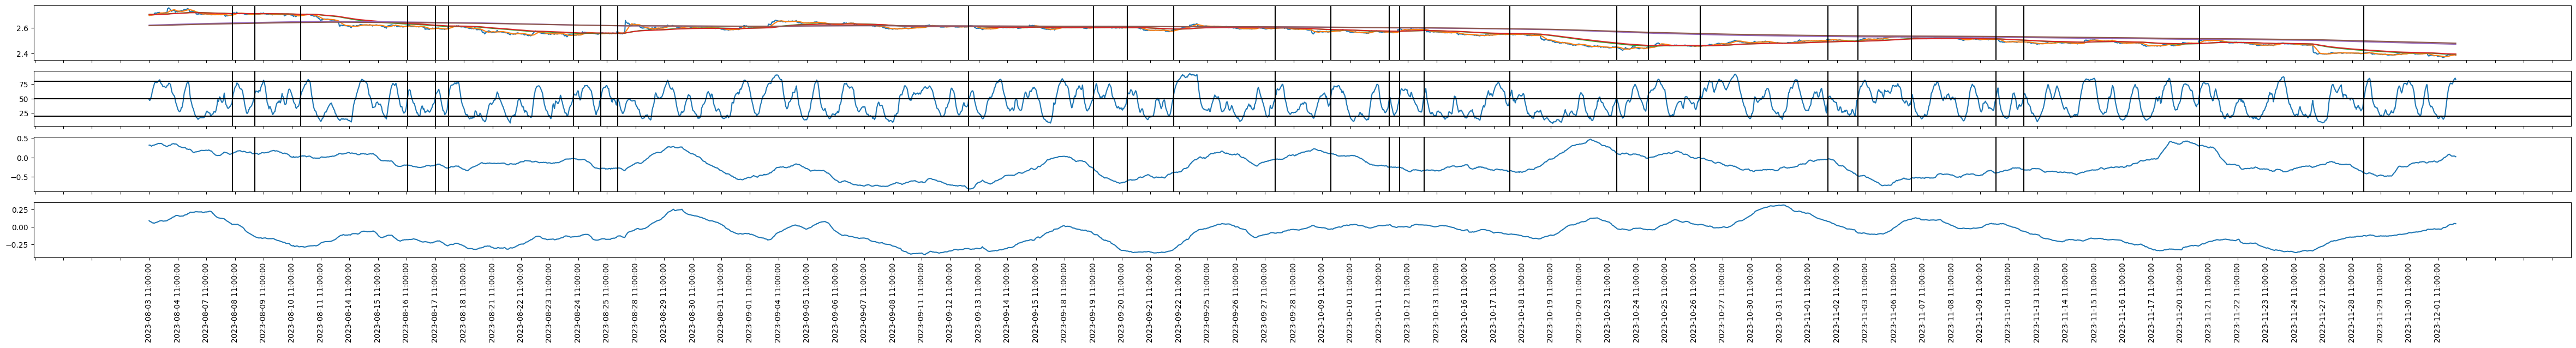

In [34]:


paras = [144, 169,  1440, 1690]
for para in paras:
    data['EMA_' + str(para)] = pd.DataFrame.ewm(data['close'], span=para).mean()


datac = data[nk:nk+5000]
nk = nk+5000
import matplotlib.ticker as ticker
# plt.xticks(rotation=90)
# plt.rcParams["figure.figsize"] = (60,6)
plt.rcParams["figure.figsize"] = (60,6)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex=True)
# fig, ax = plt.subplots(1,1)


# df22["big_small"].rolling(48, min_periods=1).mean() 
ax1.plot(datac["datetime"], datac["close"], label=2)
ax1.plot(datac["datetime"], datac["close"].rolling(12, min_periods=1).mean(), label=2)
for para in paras[0:]:
    ax1.plot(datac["datetime"], datac['EMA_' + str(para)], label=2)
# ax1.plot(datac["datetime"], datac["close"].rolling(288, min_periods=1).mean(), label=2)
# ax1.plot(datac["datetime"], datac["close"].rolling(338, min_periods=1).mean(), label=2)
# ax.plot(datac["datetime"], datac["close"].rolling(120, min_periods=1).mean(), label=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
plt.xticks(rotation=90)



# fig, ax = plt.subplots(1,1)
ax2.plot(datac["datetime"], datac["K"], label=2)
# ax.plot(datac["datetime"], datac["D"], label=2)
# ax.plot(datac["datetime"], datac["J"], label=2)
ax2.axhline(20, color="black")
ax2.axhline(50, color="black")
ax2.axhline(80, color="black")
ax2.xaxis.set_major_locator(ticker.MultipleLocator(base=48))

# ax3.plot(datac["datetime"], datac["amount_normalize20"], label=2)
ax3.plot(datac["datetime"], datac["amount_normalize20_rolling_96_mean"], label=2)
ax3.xaxis.set_major_locator(ticker.MultipleLocator(base=48))

# ax4.plot(datac["datetime"], datac["amount_normalize20"], label=2)
ax4.plot(datac["datetime"], datac["amount_nor20_e"], label=2)
ax4.xaxis.set_major_locator(ticker.MultipleLocator(base=48))

data_choose_K3 = datac[(datac["K_choose"] == "type3")]
for x in data_choose_K3["datetime"]:
    if x in datac["datetime"]:
        ax1.axvline(x, color="black")
        ax2.axvline(x, color="black")
        ax3.axvline(x, color="black")







Locator attempting to generate 2200 ticks ([-100.0, ..., 2099.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2200 ticks ([-100.0, ..., 2099.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2200 ticks ([-100.0, ..., 2099.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2200 ticks ([-100.0, ..., 2099.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2200 ticks ([-100.0, ..., 2099.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2200 ticks ([-100.0, ..., 2099.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2200 ticks ([-100.0, ..., 2099.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2200 ticks ([-100.0, ..., 2099.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2200 ticks ([-100.0, ..., 2099.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 2200 ticks ([-1

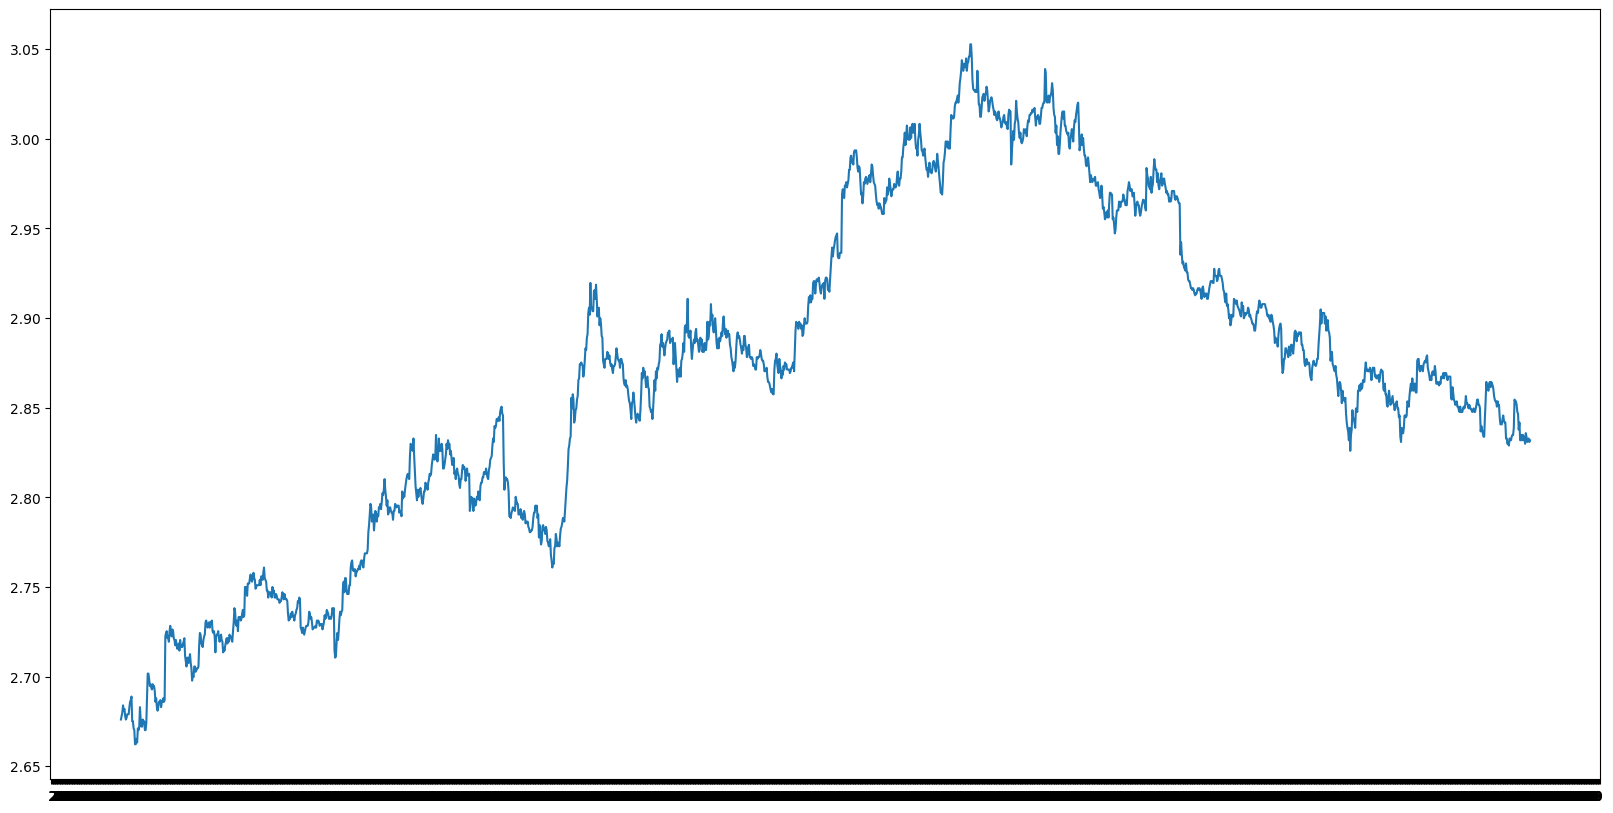

In [34]:
fig, ax = plt.subplots(1,1)
# datac.datetime.map(str)
ax.plot(datac.datetime.map(str), datac["close"], label=2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1))

In [12]:
datac["close"][:50]

index
2021-03-11 09:40:00    3.456786
2021-03-11 09:45:00    3.472361
2021-03-11 09:50:00    3.494751
2021-03-11 09:55:00    3.498645
2021-03-11 10:00:00    3.500592
2021-03-11 10:05:00    3.503512
2021-03-11 10:10:00    3.499618
2021-03-11 10:15:00    3.504486
2021-03-11 10:20:00    3.498645
2021-03-11 10:25:00    3.494751
2021-03-11 10:30:00    3.500592
2021-03-11 10:35:00    3.515194
2021-03-11 10:40:00    3.510326
2021-03-11 10:45:00    3.512273
2021-03-11 10:50:00    3.511300
2021-03-11 10:55:00    3.518114
2021-03-11 11:00:00    3.518114
2021-03-11 11:05:00    3.512273
2021-03-11 11:10:00    3.511300
2021-03-11 11:15:00    3.509353
2021-03-11 11:20:00    3.498645
2021-03-11 11:25:00    3.501565
2021-03-11 11:30:00    3.506433
2021-03-11 13:05:00    3.507406
2021-03-11 13:10:00    3.510326
2021-03-11 13:15:00    3.503512
2021-03-11 13:20:00    3.509353
2021-03-11 13:25:00    3.497671
2021-03-11 13:30:00    3.502539
2021-03-11 13:35:00    3.502539
2021-03-11 13:40:00    3.502539
20

In [13]:
def calculate_adx(df, n=14):
    # 计算动态范围（True Range）
    df['H-L'] = df['high'] - df['low']
    df['H-PC'] = abs(df['high'] - df['close'].shift(1))
    df['L-PC'] = abs(df['low'] - df['close'].shift(1))
    df['TR'] = df[['H-L', 'H-PC', 'L-PC']].max(axis=1)

    # 计算方向线指标（Directional Movement Indicator）
    df['DM+'] = np.where(df['high'].diff() > df['low'].diff(), df['high'].diff(), 0)
    df['DM-'] = np.where(df['low'].diff() > df['high'].diff(), df['low'].diff(), 0)

    # 计算动态范围和方向线指标的平滑移动平均值
    df['ATR'] = df['TR'].rolling(window=n).mean()
    df['DM+MA'] = df['DM+'].rolling(window=n).mean()
    df['DM-MA'] = df['DM-'].rolling(window=n).mean()

    # 计算动态范围和方向线指标的方向性指标（Directional Indicator）
    df['DI+'] = (df['DM+MA'] / df['ATR']) * 100
    df['DI-'] = (df['DM-MA'] / df['ATR']) * 100

    # 计算动态范围和方向线指标的方向性指标差值和比值
    df['DI_diff'] = abs(df['DI+'] - df['DI-'])
    df['DI_sum'] = df['DI+'] + df['DI-']
    df['DX'] = (df['DI_diff'] / df['DI_sum']) * 100

    # 计算ADX指标
    df['ADX_{}'.format(n)] = df['DX'].rolling(window=n).mean()

    # 删除中间计算的列
    df.drop(['H-L', 'H-PC', 'L-PC', 'TR', 'DM+', 'DM-', 'ATR', 'DM+MA', 'DM-MA', 'DI+', 'DI-', 'DI_diff', 'DI_sum', 'DX'],
            axis=1, inplace=True)

    return df

In [14]:
data = calculate_adx(data, n=20*48)

In [15]:
data = calculate_adx(data, n=5*48)

# data = calculate_adx(data, n=48)

In [16]:
data = calculate_adx(data, n=15*48)

In [17]:
data.columns

Index(['open', 'close', 'high', 'low', 'vol', 'amount', 'datetime', 'code',
       'date', 'date_stamp', 'time_stamp', 'type', 'volume', 'suogu',
       'preclose', 'adj', 'K', 'D', 'J', 'EMA_144', 'EMA_169', 'EMA_1440',
       'EMA_1690', 'ADX_960', 'ADX_240', 'ADX_720'],
      dtype='object')

In [18]:
data = calculate_kdj(data, n=9*6, k_period=3*6, d_period=3*6)

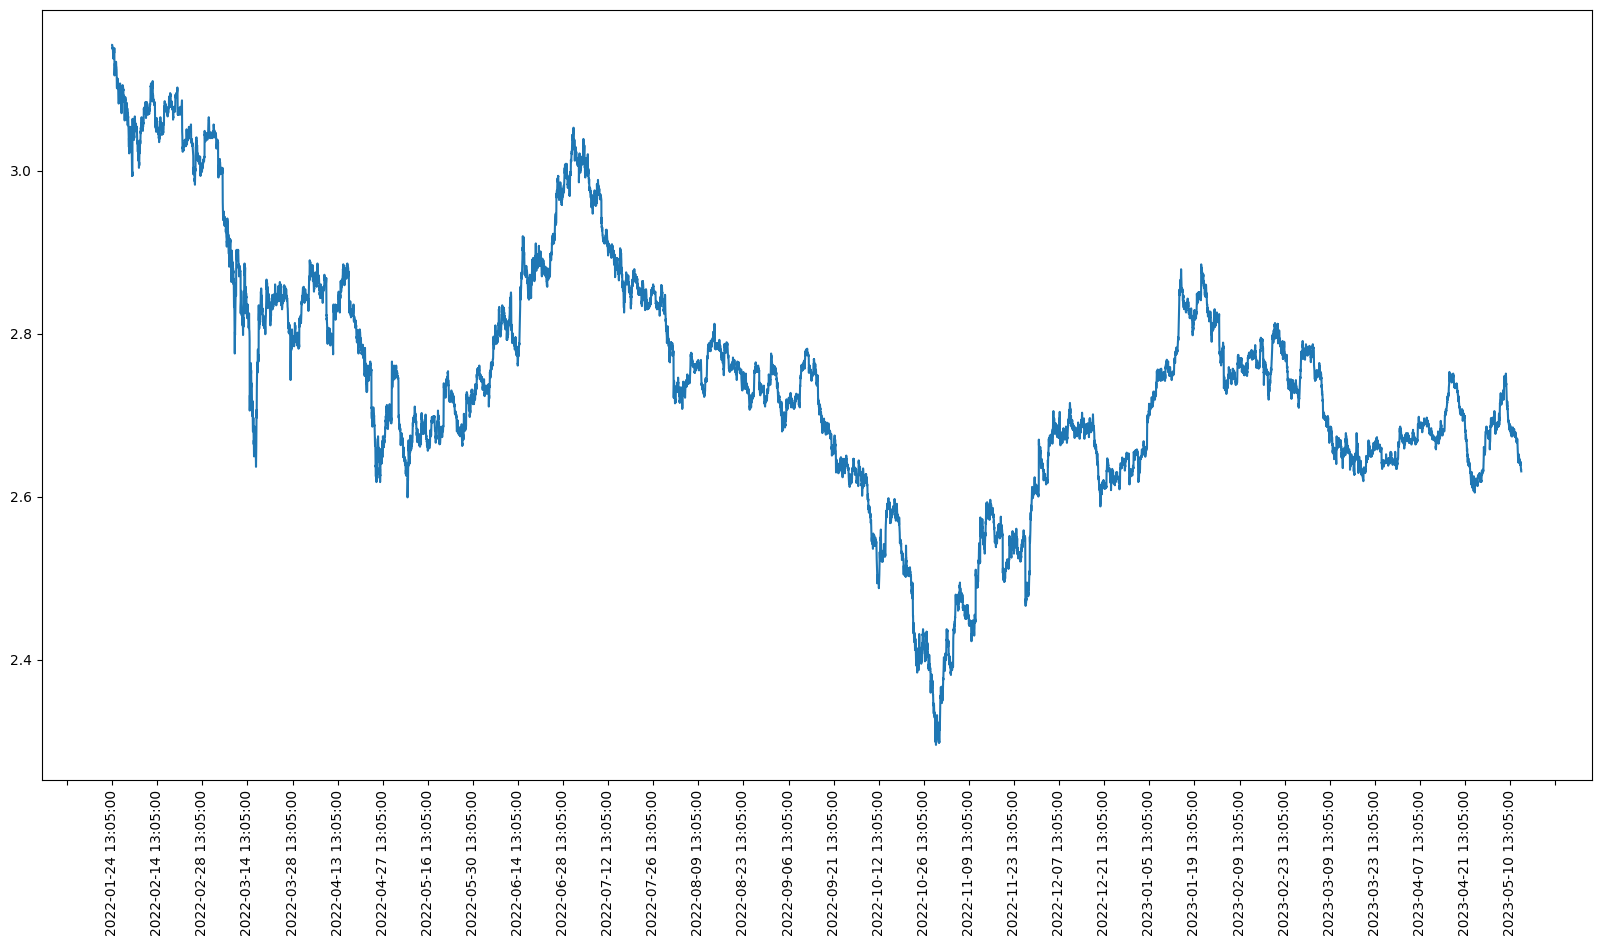

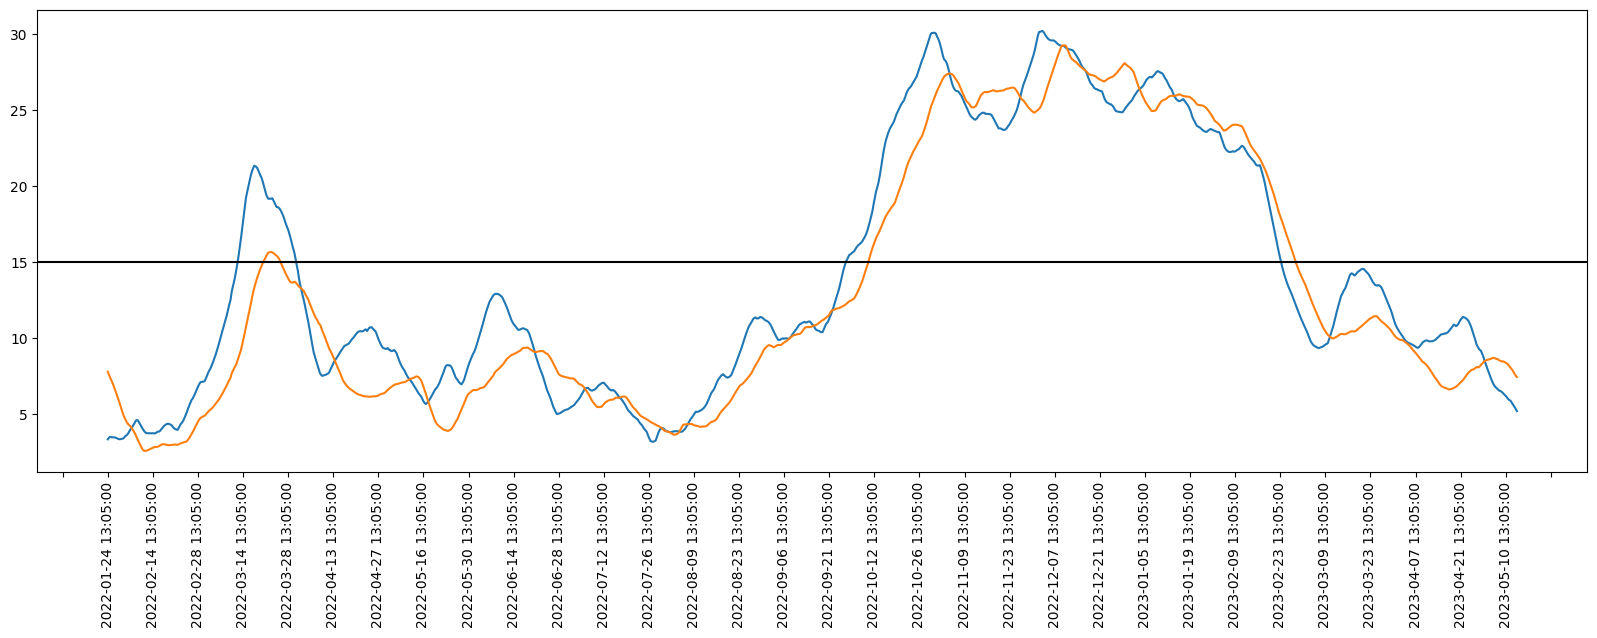

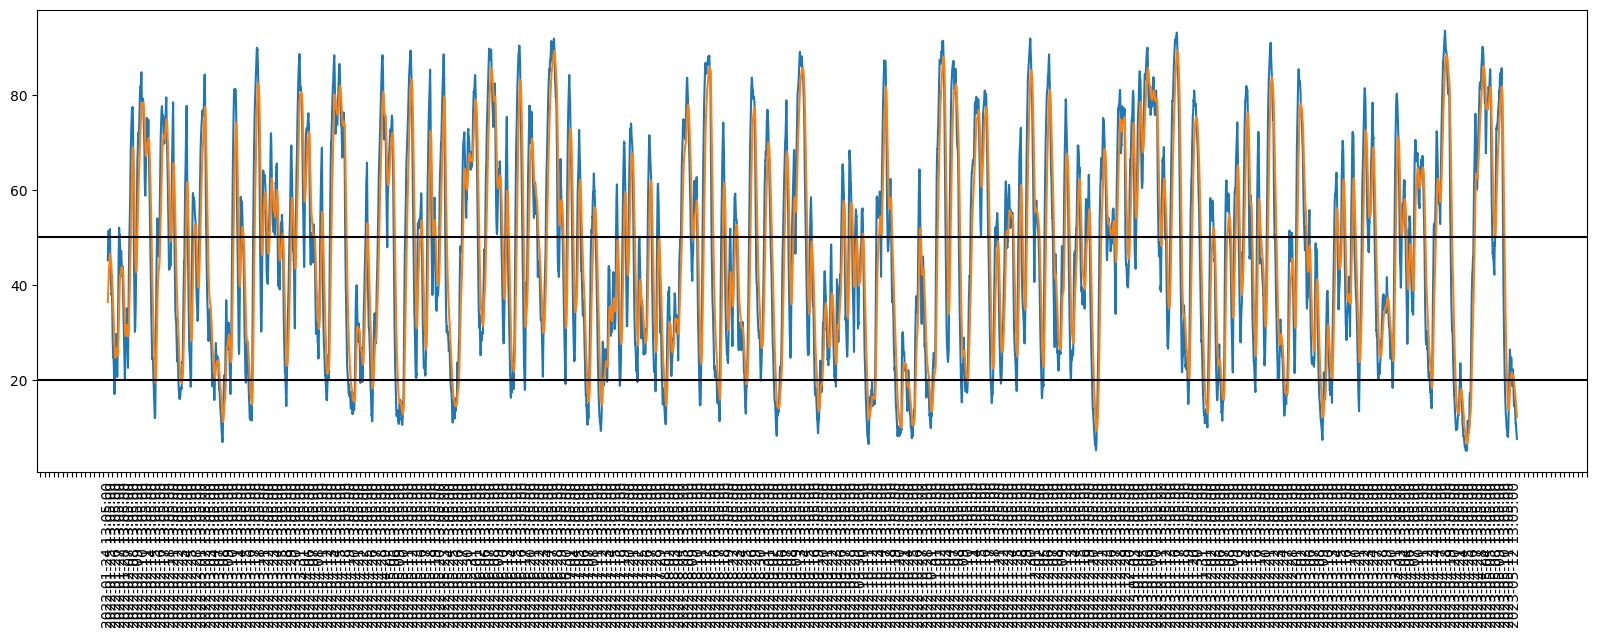

In [19]:
datac = data[-15000:]
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1,1)

ax.plot(datac["datetime"], datac["close"], label=2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=480))
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,6)


fig, ax = plt.subplots(1,1)
ax.plot(datac["datetime"], datac["ADX_720"], label=2)
# ax.plot(datac["datetime"], datac["ADX_240"], label=2)
ax.plot(datac["datetime"], datac["ADX_960"], label=2)
ax.axhline(15, color="black")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=480))
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,6)

fig, ax = plt.subplots(1,1)
ax.plot(datac["datetime"], datac["K"], label=2)
ax.plot(datac["datetime"], datac["D"], label=2)
# ax.plot(datac["datetime"], datac["J"], label=2)
ax.axhline(20, color="black")
ax.axhline(50, color="black")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,6)

In [70]:
def calculate_spectrum_energy(data):
    close = np.array(data["close"])
    fft_result= np.fft.fft(close)
    spectrum_energy = np.abs(fft_result) ** 2
    data["spectrum_energy"] = np.log(spectrum_energy)
    return data

In [71]:
data = calculate_spectrum_energy(data)

In [73]:
max(data["spectrum_energy"])

22.446287668245876

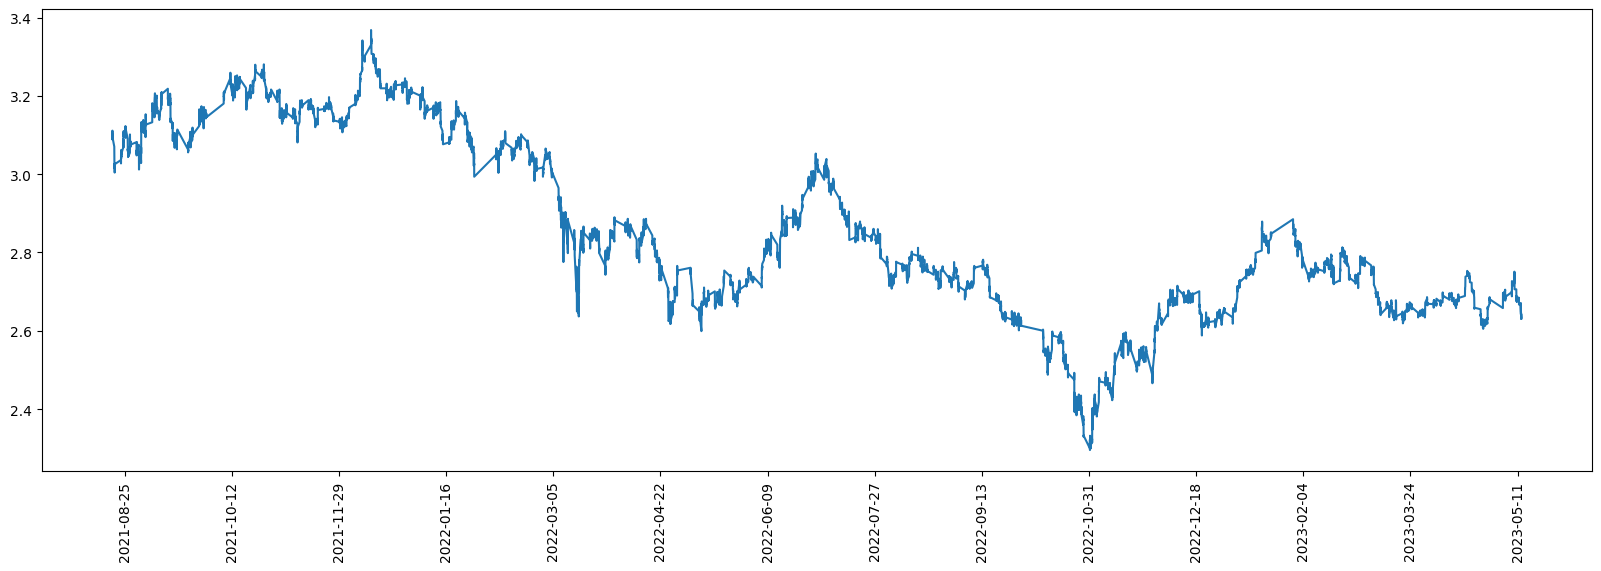

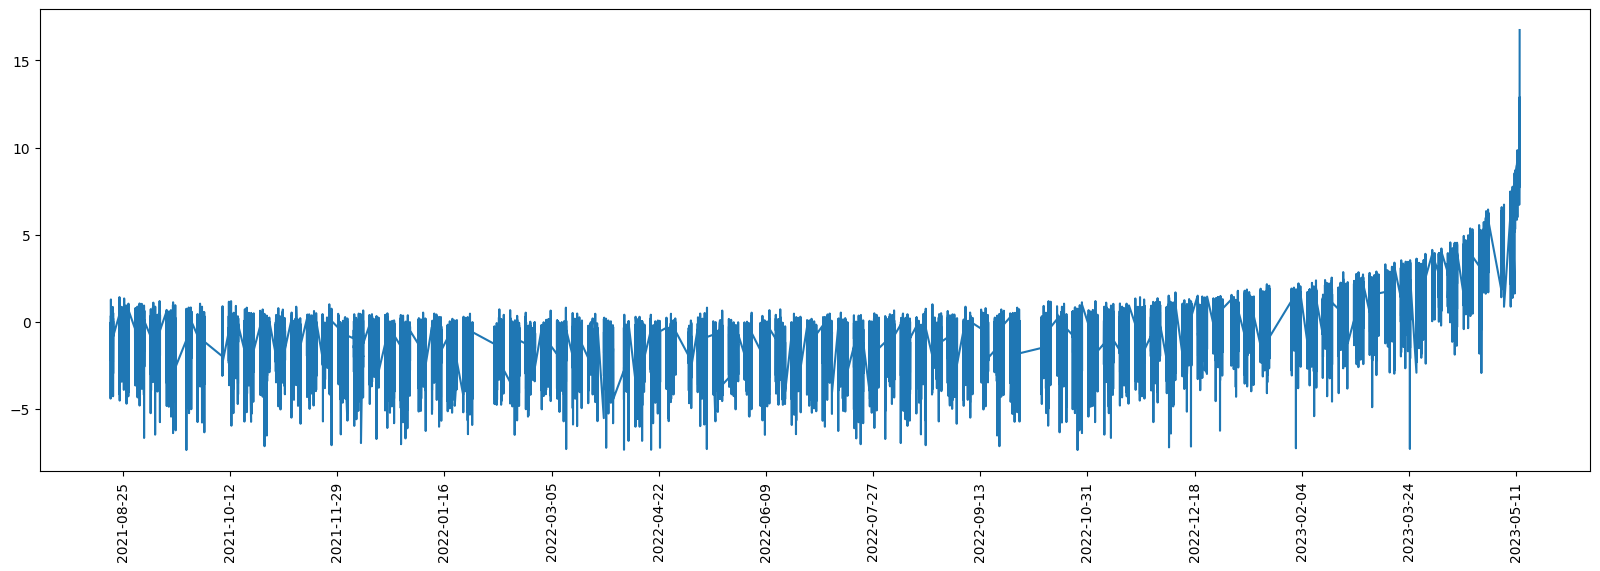

In [74]:
datac = data[-20000:]
import matplotlib.ticker as ticker
fig, ax = plt.subplots(1,1)

ax.plot(datac["datetime"], datac["close"], label=2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,6)


fig, ax = plt.subplots(1,1)
ax.plot(datac["datetime"], datac["spectrum_energy"], label=2)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=48))
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (20,6)

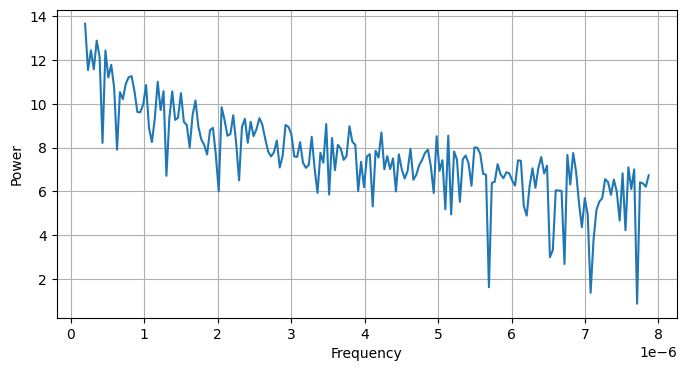

In [103]:
signal = data["close"]
# 傅里叶变换
fft_result = np.fft.fft(signal)

# 计算频谱
spectrum = np.abs(fft_result) ** 2
spectrum = np.log(spectrum)

# 可视化频谱
plt.figure(figsize=(8, 4))
freq = np.fft.fftfreq(len(data["datetime"]), d=1000)  # 计算频率
plt.plot(freq[5:200], spectrum[5:200])
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.grid(True)
plt.show()

In [79]:
len(freq)

25295

In [82]:
min(spectrum)

0.000631450825553756